In [1]:
import os

import mlflow
import pandas as pd
import tensorflow as tf
from src import utils
from src.features.dataset import (AugmentedImagesDatasetGenerator,
                                  configure_for_performance)
from src.models.get_model import get_model
from src.models.model_trainer import train_model

DATASETS_BASE = os.path.join(utils.DATA_PATH, "processed")


def get_dataset(split: str) -> tf.data.Dataset:

    annotations_path = os.path.join(DATASETS_BASE, split, "annotations.csv")
    annotations = pd.read_csv(annotations_path)

    images_path = os.path.join(DATASETS_BASE, split, "images")

    dataset_generator = AugmentedImagesDatasetGenerator(
        images_path=images_path,
        annotations=annotations
    )

    dataset = tf.data.Dataset.from_generator(
        dataset_generator.get_image,
        output_signature=(tf.TensorSpec(shape=(256, 256, 3)), tf.TensorSpec(shape=(4, )))
    )

    dataset = configure_for_performance(dataset)

    return dataset

2023-01-05 19:01:36.942173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 19:01:37.079065: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-05 19:01:37.082603: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 19:01:37.082618: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2023-01-05 19:01:38,251 - matplotlib - DEBUG - matplotlib data path: /home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/matplotlib/mpl-data
2023-01-05 19:01:38,254 - matplotlib - DEBUG - CONFIGDIR=/home/gianfranco/.config/matplotlib
2023-01-05 19:01:38,255 - matplotlib - DEBUG - interactive is False
2023-01-05 19:01:38,255 - matplotlib - DEBUG - platform is linux
2023-01-05 19:01:38,309 - matplotlib - DEBUG - CACHEDIR=/home/gianfranco/.cache/matplotlib
2023-01-05 19:01:38,313 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/gianfranco/.cache/matplotlib/fontlist-v330.json


2023-01-05 19:01:38.670289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-05 19:01:38.670311: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-05 19:01:38.670324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gianfranco-HP-EliteBook-850-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-01-05 19:01:38.670536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
T

2023-01-05 19:01:39,279 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-05 19:01:39,281 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-05 19:01:39,282 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-01-05 19:01:39,283 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-05 19:01:39,283 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', vari

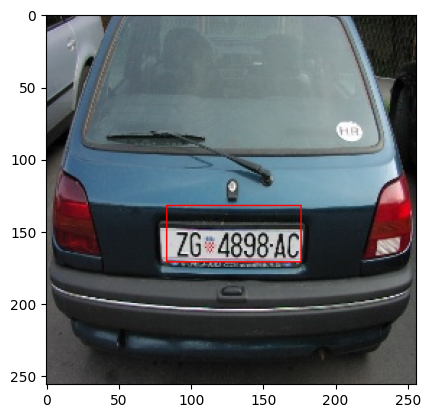

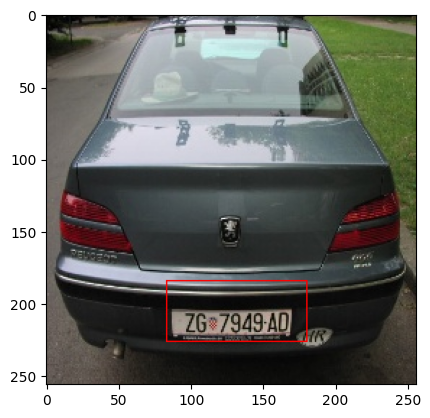

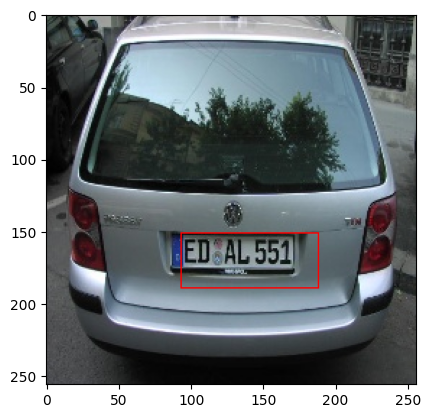

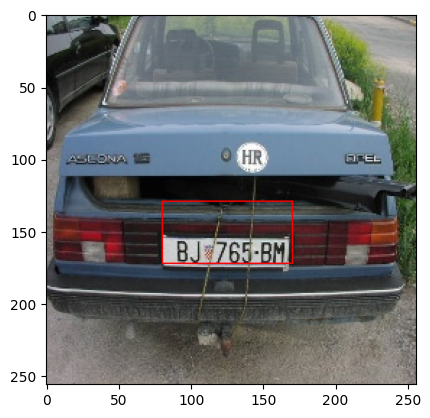

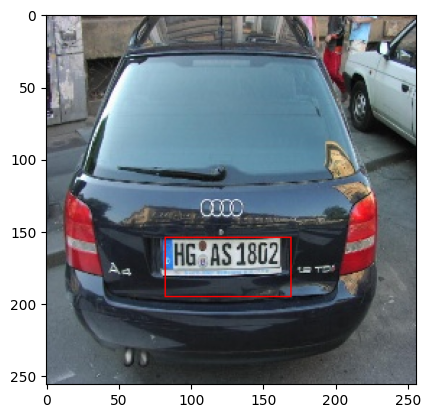

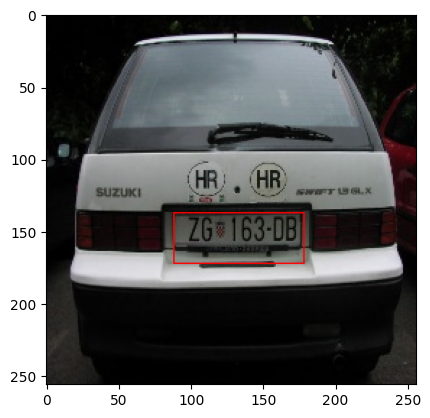

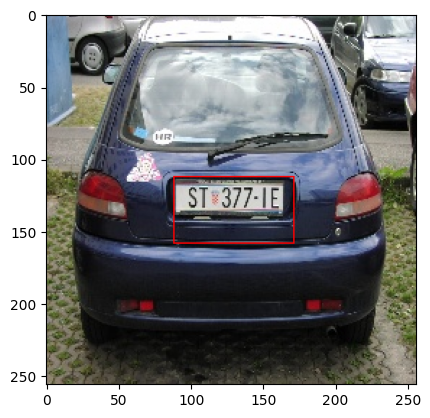

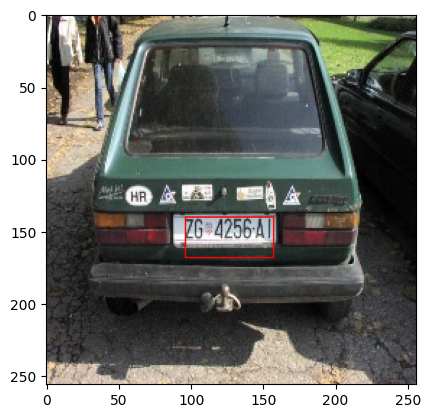

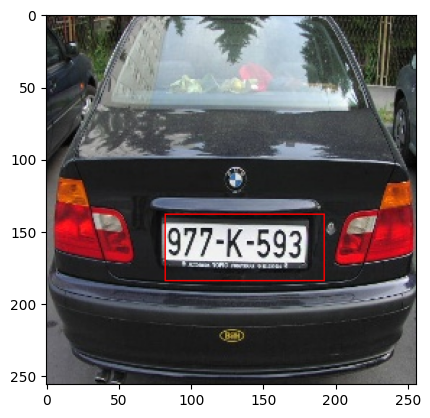

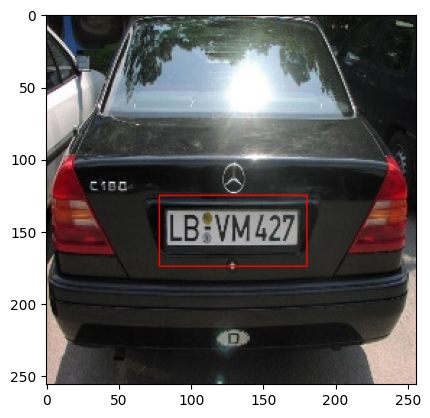

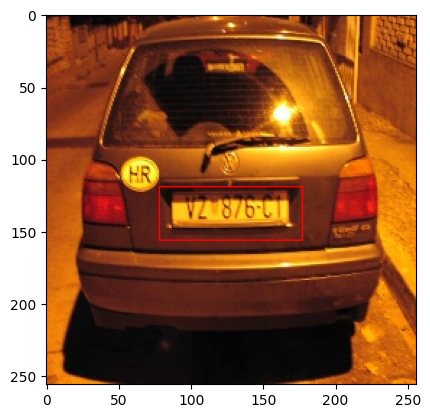

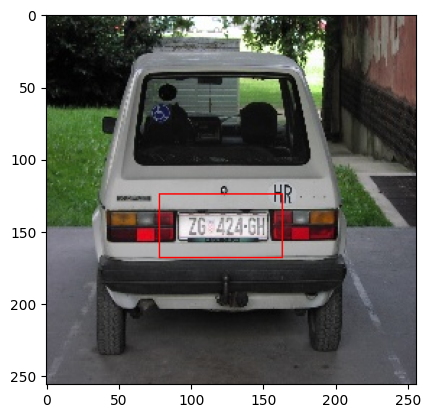

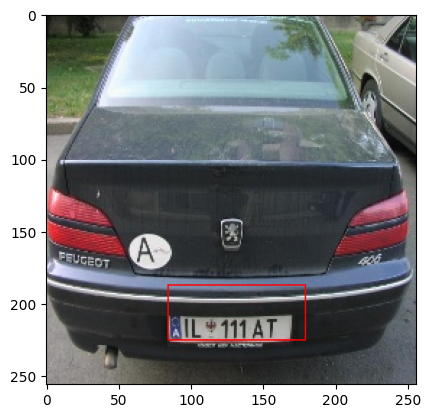

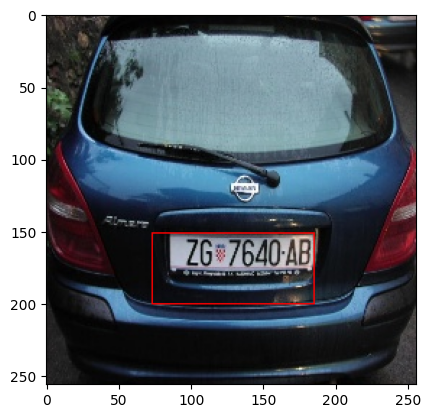

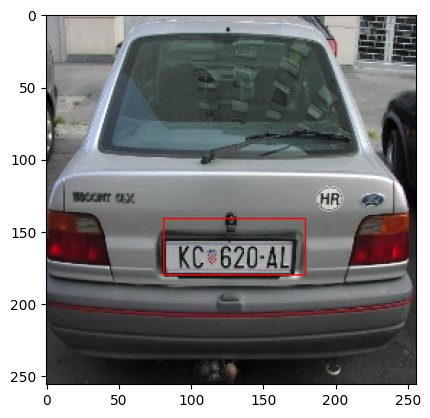

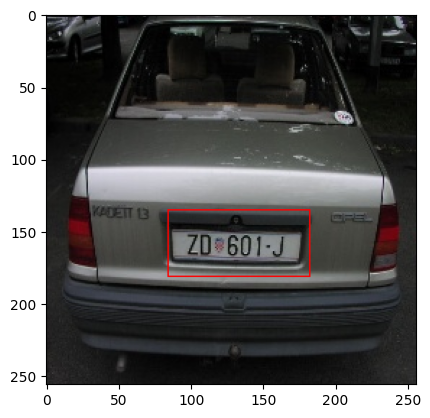

In [2]:
from src.visualization.visualize import show_image
import numpy as np
from shapely.geometry import box
import cv2
import matplotlib.pyplot as plt
train_set = get_dataset("train")
validation_set = get_dataset("validation")

batch = list(train_set.take(1))[0]
images, annotations = batch[0], batch[1]

for (image, annotation) in zip(images[:], annotations[:]):
    bbox = box(*annotation.numpy().astype(np.uint8))
    show_image(image, bbox)

    # image = image.numpy().astype(np.uint8)
    # cv2.rectangle(image, (int(annotation[2]), int(annotation[3])), (int(annotation[0]), int(annotation[1])), color=(255, 0, 0))        
    # plt.figure()
    # plt.imshow(image)